In [1]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import albumentations as A
import cv2
from datasets import nii_loader
from utils import drawhistogram
data = nii_loader('LGE',hist_match=True)['image']
label = nii_loader('LGE',is_label=True)['image']
image = data[:len(label)]

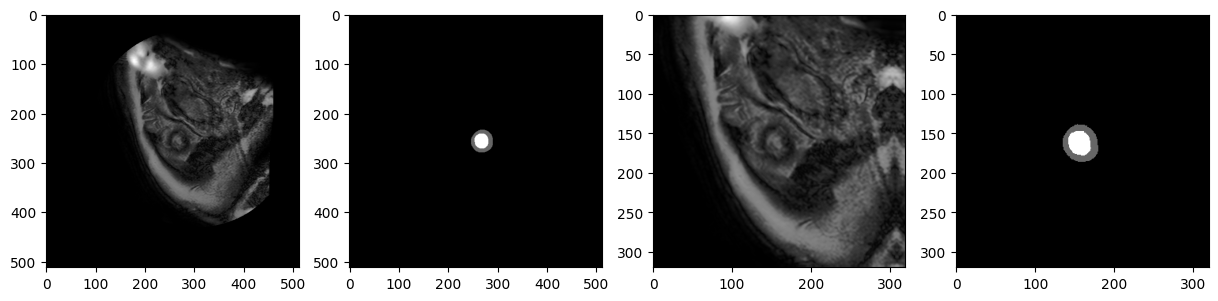

In [26]:
train_transforms = A.Compose([
            A.Resize(512,512,interpolation=cv2.INTER_LINEAR),
            A.CenterCrop(height=320,width=320),
            #A.ShiftScaleRotate(),
            A.ElasticTransform(alpha=200,sigma=100,alpha_affine=20,p=1),
            #A.RandomRotate90(),
            #A.VerticalFlip(),
            #A.Transpose(),
            #A.OpticalDistortion(p=1,distort_limit=2)
        ])
index = 1
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image[index],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(label[index],cmap='gray')
plt.subplot(1,4,3)
plt.imshow(ipro,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mpro,cmap='gray')

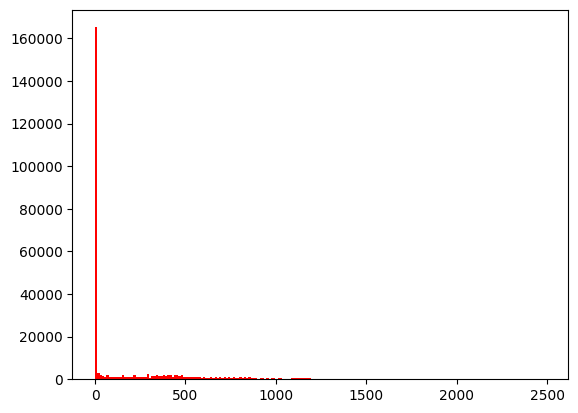

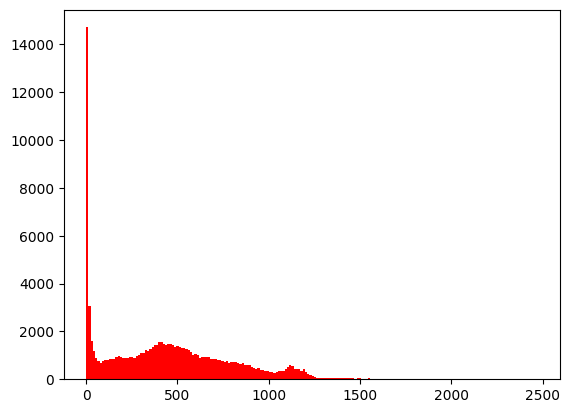

In [4]:
drawhistogram(image[index])
drawhistogram(ipro)